<a href="https://colab.research.google.com/github/Ehtisham1053/Classification-ML-algorithms/blob/main/Bagging_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA

In [8]:
class BaggingClassifier:
    def __init__(self, n_estimators=10, sample_size=0.8, max_depth=None):
        self.n_estimators = n_estimators
        self.sample_size = sample_size
        self.max_depth = max_depth
        self.models = []
        self.subsets = []

    def fit(self, X, y):
        self.models = []
        self.subsets = []
        n_samples = int(self.sample_size * len(X))

        for _ in range(self.n_estimators):
            indices = np.random.choice(len(X), n_samples, replace=True)
            X_subset, y_subset = X[indices], y[indices]
            model = DecisionTreeClassifier(max_depth=self.max_depth)
            model.fit(X_subset, y_subset)
            self.models.append(model)
            self.subsets.append(indices)

    def predict(self, X):
        predictions = np.array([model.predict(X) for model in self.models])
        return np.round(np.mean(predictions, axis=0))

    def evaluate(self, X_train, y_train, X_test, y_test):
        y_train_pred = self.predict(X_train)
        y_test_pred = self.predict(X_test)

        train_acc = accuracy_score(y_train, y_train_pred)
        test_acc = accuracy_score(y_test, y_test_pred)
        cm = confusion_matrix(y_test, y_test_pred)
        report = classification_report(y_test, y_test_pred)

        print("Training Accuracy:", train_acc)
        print("Testing Accuracy:", test_acc)
        print("Confusion Matrix:\n", cm)
        print("Classification Report:\n", report)

        # return train_acc, test_acc, cm, report

In [9]:
# Load Dataset from seaborn
data = sns.load_dataset("penguins").dropna()
X = data.drop(columns=['species']).select_dtypes(include=[np.number]).values
y = data['species'].astype('category').cat.codes.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Train and Evaluate Bagging Classifier
bagging_clf = BaggingClassifier(n_estimators=10, sample_size=0.8, max_depth=3)
bagging_clf.fit(X_train, y_train)
bagging_clf.evaluate(X_train, y_train, X_test, y_test)

Training Accuracy: 0.9624060150375939
Testing Accuracy: 0.9850746268656716
Confusion Matrix:
 [[31  0  0]
 [ 1 12  0]
 [ 0  0 23]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        31
           1       1.00      0.92      0.96        13
           2       1.00      1.00      1.00        23

    accuracy                           0.99        67
   macro avg       0.99      0.97      0.98        67
weighted avg       0.99      0.99      0.98        67



In [6]:
# Reduce Features to 2 for Decision Boundary Plotting
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
X_pca = pca.transform(X)

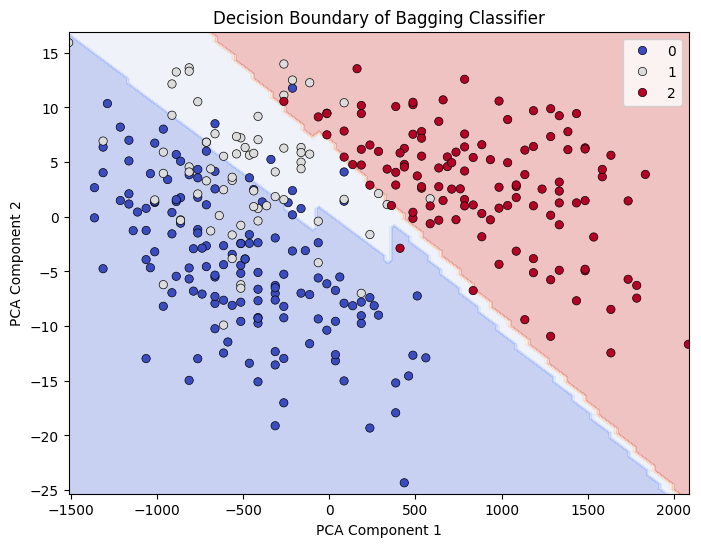

In [7]:
xx, yy = np.meshgrid(np.linspace(X_pca[:,0].min()-1, X_pca[:,0].max()+1, 100),
                     np.linspace(X_pca[:,1].min()-1, X_pca[:,1].max()+1, 100))
Z = bagging_clf.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, palette='coolwarm', edgecolor='k')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Decision Boundary of Bagging Classifier")
plt.show()